In [1]:
#The following code generates the summary of the trading activities of the stock of COH

In [2]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import os
import pandas as pd
import numpy as np
import datetime
import copy
#Reading the file
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)
#Concatenating all the sheets to a single sheet
out_df = pd.concat(cdf,ignore_index=True)
#Saving the resultant dataframe to a csv
out_df.to_csv("SingleSheetCOH.csv")

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import *
import copy
import matplotlib.ticker as tick
import warnings
warnings.filterwarnings("ignore")
TLS_writer = pd.ExcelWriter('COH_Summary.xlsx', engine='xlsxwriter')

In [5]:
xl_file = pd.ExcelFile("COH Course of Sales.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

tempdfs=copy.deepcopy(dfs)
for key in dfs.keys():
    if(len(dfs[key])==0):
        del tempdfs[key]
dfs=tempdfs

daily_dataframe={}
daily_dataframe['Date']=[]
daily_dataframe['AvgValue'] = []
daily_dataframe['AvgVolume'] = []
daily_dataframe['NumTrades'] = []

for key in dfs.keys():
    tdf=dfs[key]
    nine_to_four_df=tdf
    nine_to_four_df=nine_to_four_df.sort_values(by="TradeTime")
    date=nine_to_four_df.iloc[0]["TradeDate"].date()
    avgvalue=nine_to_four_df['TradeValue'].sum()
    avgvolume=nine_to_four_df['TradeVolume'].sum()
    numtrades=len(nine_to_four_df)
    daily_dataframe['Date'].append(date)
    daily_dataframe['AvgValue'].append(avgvalue)
    daily_dataframe['AvgVolume'].append(avgvolume)
    daily_dataframe['NumTrades'].append(numtrades)

TLS_daily_df=pd.DataFrame.from_dict(daily_dataframe)
TLS_daily_df=TLS_daily_df.sort_values(by=['Date'])

In [6]:
TLS_daily_df.to_excel(TLS_writer, sheet_name='Tradingpattern_daily_stats')

# Daily Trading Stats

In [7]:
def generate_date2(date):
    return int(str(date).split("-")[2])
TLS_daily_df=pd.DataFrame.from_dict(daily_dataframe)
TLS_daily_df["Date2"]=TLS_daily_df["Date"].apply(generate_date2)
TLS_daily_df=TLS_daily_df.sort_values(by=['Date'])

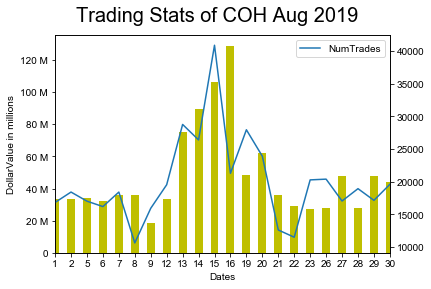

In [8]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
TLS_daily_df["AvgValue"].plot(kind='bar',color='y')
TLS_daily_df['NumTrades'].plot(kind='line', secondary_y=True)
ax.set_xticklabels(TLS_daily_df["Date2"])
ax.set_ylabel('DollarValue in millions')
ax.set_xlabel('Dates')
# Create another axes that shares the same x-axis as ax.
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0]
    suffix  = ["G", "M", "k", ""]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return y

ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
fig.suptitle("Trading Stats of COH Aug 2019", fontsize=20)
plt.legend(loc='upper right')
plt.style.use('seaborn')
plt.show()
#plt.savefig('TLS_Daily_AVGTradeVol.png')

# Distribution of TradeCategory

In [9]:
import os
import pandas as pd
import numpy as np
import datetime
import copy
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

(out_df["CondCodes"]).unique()

ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]


m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","MC","LT"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

m2 = {v: k for k,vv in m.items() for v in vv}

ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))

import os
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt 
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

matching=out_df.loc[out_df["Reason"]=="MATCH"]

non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

from datetime import time
A=time(hour =9, minute = 59, second = 45)
B=time(hour =10, minute = 10, second = 0)

openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

from datetime import time
A=time(hour =16, minute = 0, second = 0)
B=time(hour =16, minute = 12, second = 0)
closingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

openingauction["CondCodes"]="OpeningAuction"

closingauction["CondCodes"]="ClosingAuction"

auction=pd.concat([openingauction,closingauction])

totaldf=pd.concat([auction,non_auction])

asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

t0=totaldf.loc[totaldf["CondCodes"]=="EP" ]
t1=totaldf.loc[totaldf["CondCodes"]=="EPXT"]
t2=totaldf.loc[totaldf["CondCodes"]=="EC"]
t3=totaldf.loc[totaldf["CondCodes"]=="ECXT"]
optionsdf=pd.concat([t0,t1,t2,t3])

temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
for val in temp:
    trade_blocklist.append(val+str("XT"))

    temp=["L","LT","L1","L2","L3","L4","L5"]
trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
for val in temp:
    trade_otherlist.append(val+str("XT"))

trade_optionslist=["EC","ECXT","EP","EPXT"]
trade_misc=["OSXT","ET","ETXT"]
trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))


In [10]:
tempdf=pd.concat([asxdf,ChiXdf])

In [11]:
Group_Trade_df=tempdf.groupby("Tradetype").sum()

Group_Trade_df.reset_index(inplace=True)

from collections import Counter 

Counter_trades = Counter(tempdf["Tradetype"])

totaltrades=sum(list(Counter_trades.values()))

labels=list(Counter_trades.keys())

sizes=list(Counter_trades.values())
sizes=np.array(sizes)/totaltrades
listsizes=list(sizes)
TLS_temp_df = pd.DataFrame(list(zip(labels,listsizes)))
TLS_temp_df.to_excel(TLS_writer, sheet_name='Categories_numberoftrades')

# TradeValue

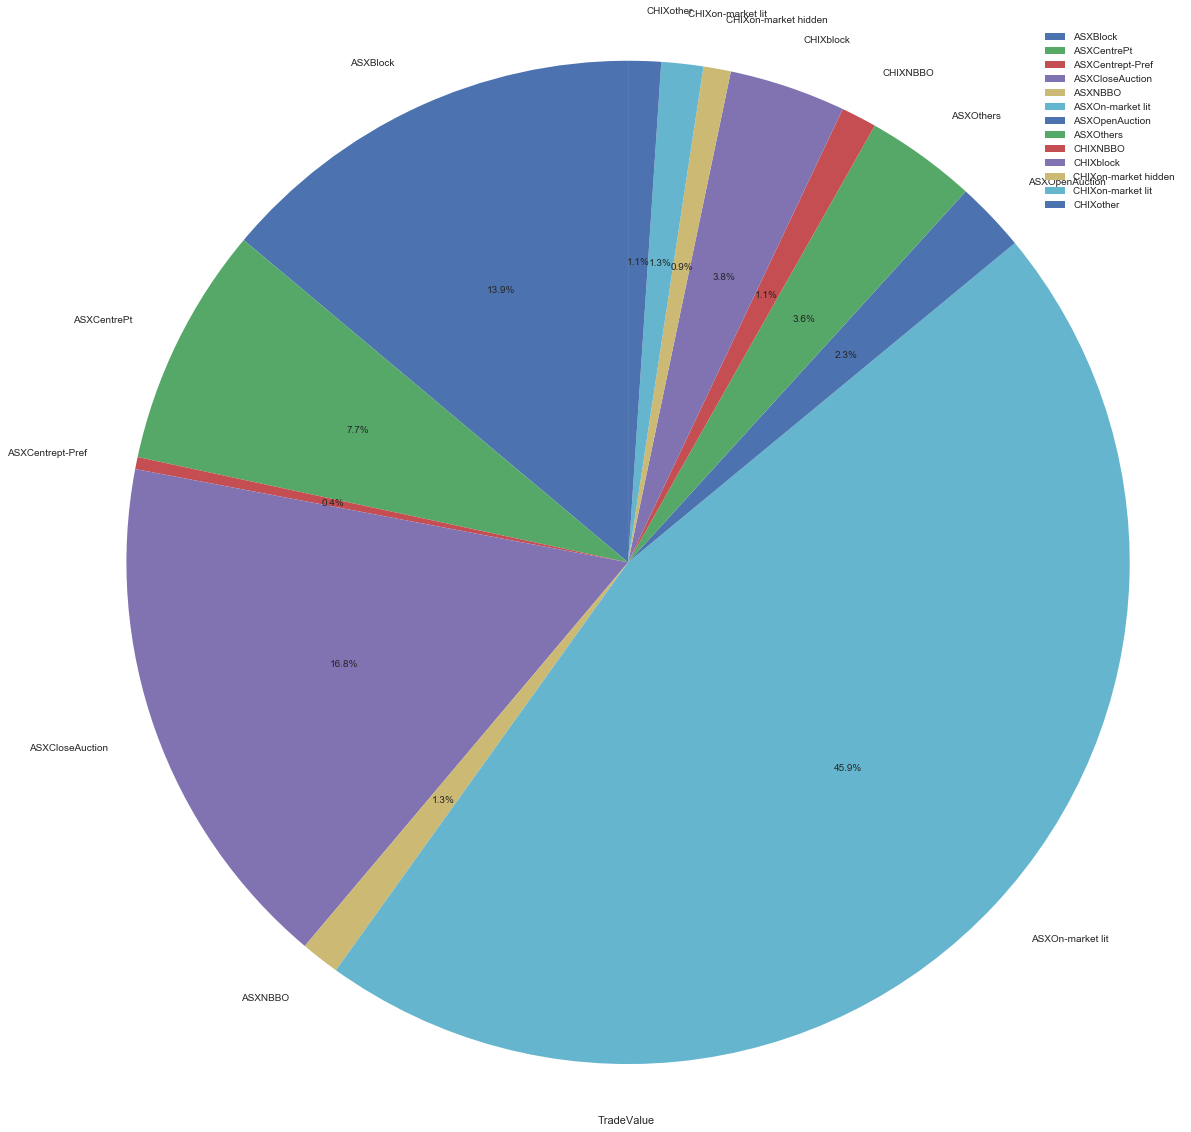

In [12]:
sizes=Group_Trade_df["TradeValue"]/sum(Group_Trade_df["TradeValue"])
labels=Group_Trade_df["Tradetype"]
listsizes=list(sizes)
TLS_temp_df = pd.DataFrame(list(zip(labels,listsizes)))
TLS_temp_df.to_excel(TLS_writer, sheet_name='Categories_tradevalues')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
ax.pie(sizes, labels=labels,startangle=90,autopct = '%1.1f%%')
ax.axis('equal')
plt.xlabel('TradeValue')
plt.legend() 
plt.show()

# TradeVolume

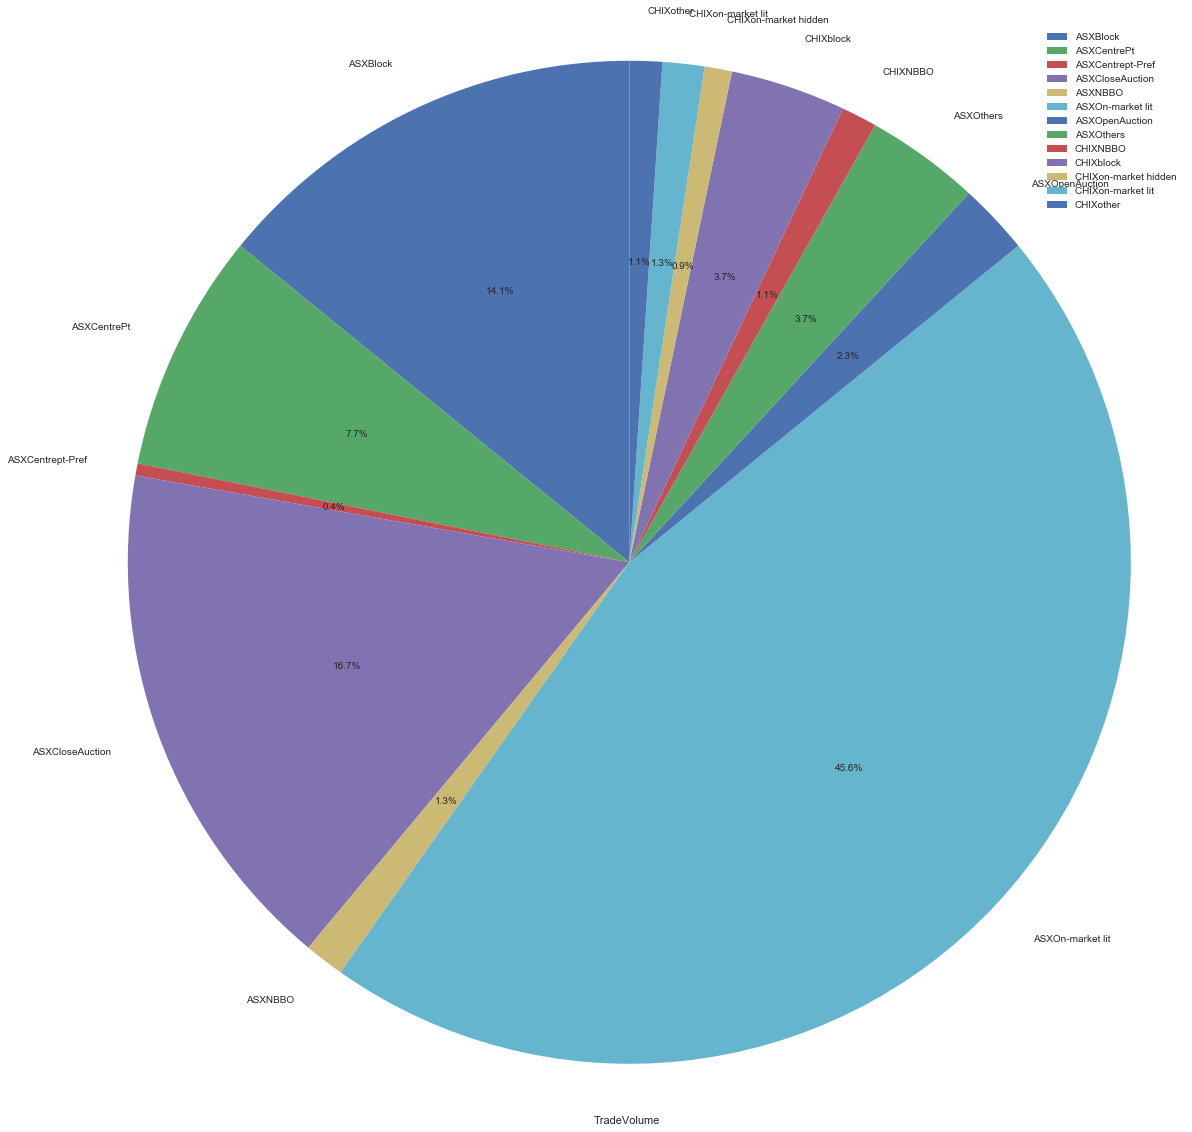

In [13]:
sizes=Group_Trade_df["TradeVolume"]/sum(Group_Trade_df["TradeVolume"])
labels=Group_Trade_df["Tradetype"]
listsizes=list(sizes)
TLS_temp_df = pd.DataFrame(list(zip(labels,listsizes)))
TLS_temp_df.to_excel(TLS_writer, sheet_name='Categories_tradeVolume')
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(20, 20))
ax1.pie(sizes, labels=labels,startangle=90,autopct = '%1.1f%%')
ax1.axis('equal')
plt.xlabel('TradeVolume')
plt.legend() 
plt.show()

# Price Pressure

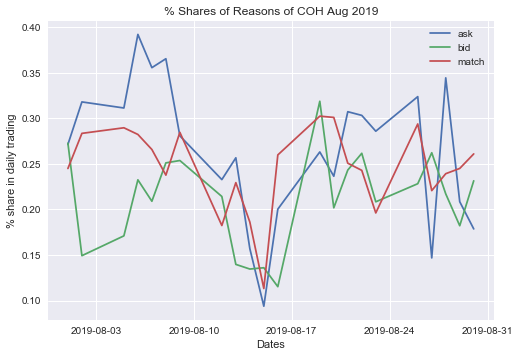

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy
from datetime import time

xl_file = pd.ExcelFile("COH Course of Sales.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

tempdfs=copy.deepcopy(dfs)
for key in dfs.keys():
    if(len(dfs[key])==0):
        del tempdfs[key]
dfs=tempdfs
daily_dataframe={}
daily_dataframe['Date']= []
daily_dataframe['ask']= []
daily_dataframe['bid']= []
daily_dataframe['match']= []
daily_dataframe['nan']= []
for key in dfs.keys():
    tdf=dfs[key]
    out_df=copy.deepcopy(tdf)
    tempdf=copy.deepcopy(out_df)  
    price_pressure = {"1": ["ASK"], "2": ["BID"], "3": ["MATCH"],"4":[np.nan]}
    price_pressure_values = {v: k for k,vv in price_pressure.items() for v in vv}
    tempdf["Reason"]=tempdf.Reason.map(price_pressure_values).astype("category", categories=set(price_pressure_values.values()))
    date=tempdf.iloc[0]["TradeDate"].date()
    ppdf=tempdf.groupby("Reason").sum()
    ppdf.reset_index(inplace=True)
    sizes=ppdf["TradeVolume"]/sum(ppdf["TradeVolume"])
    labels=ppdf["Reason"]
    numask=0
    numnan=0
    numbid=0
    nummatch=0
    for i in range(len(labels)):
        if(labels[i]=="1"):
            numask=sizes[i]
        elif(labels[i]=="4"):
            numnan=sizes[i]
        elif(labels[i]=="3"):
            numbid=sizes[i]
        elif(labels[i]=="2"):
            nummatch=sizes[i]
    daily_dataframe['Date'].append(date)
    daily_dataframe['ask'].append(numask)
    daily_dataframe['bid'].append(numbid)
    daily_dataframe['match'].append(nummatch)
    daily_dataframe['nan'].append(numnan)

def generate_date2(date):
    return int(str(date).split("-")[2])
TLS_daily_df=pd.DataFrame.from_dict(daily_dataframe)
TLS_daily_df["Date2"]=TLS_daily_df["Date"].apply(generate_date2)
TLS_daily_df=TLS_daily_df.sort_values(by=['Date'])
TLS_daily_df.to_excel(TLS_writer, sheet_name='Daily_Price_pressure')
plt.style.use('seaborn')
plt.ylabel('% share in daily trading')
plt.xlabel('Dates')
plt.title("% Shares of Reasons of COH Aug 2019")
plt.plot(TLS_daily_df["Date"], TLS_daily_df["ask"])
plt.plot(TLS_daily_df["Date"], TLS_daily_df["bid"])
plt.plot(TLS_daily_df["Date"], TLS_daily_df["match"])
plt.legend(loc='upper right')
plt.show()

# Daily Stats

In [15]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy
xl_file = pd.ExcelFile("COH Course of Sales.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

tempdfs=copy.deepcopy(dfs)
for key in dfs.keys():
    if(len(dfs[key])==0):
        del tempdfs[key]
dfs=tempdfs

daily_dataframe={}
daily_dataframe['Date'] = []
daily_dataframe['Open'] = []
daily_dataframe['Close'] = []
daily_dataframe['Low'] = []
daily_dataframe['High'] = []
daily_dataframe['Vwap'] = []
count=0
from datetime import time
A=time(hour =9, minute = 59, second = 45)
B=time(hour =10, minute = 10, second = 0)
A1=time(hour =16, minute = 0, second = 0)
B1=time(hour =16, minute = 12, second = 0)
for key in dfs.keys():
    count=count+1
    tdf=dfs[key]
    out_df=copy.deepcopy(tdf)
    matching=out_df.loc[out_df["Reason"]=="MATCH"]
    non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

    openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]
    closingauction=matching.loc[(matching['TradeTime']>=A1)&(matching['TradeTime']<=B1)]

    openingauction["CondCodes"]="OpeningAuction"

    closingauction["CondCodes"]="ClosingAuction"

    auction=pd.concat([openingauction,closingauction])

    totaldf=pd.concat([auction,non_auction])

    asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

    t0=totaldf.loc[totaldf["CondCodes"]=="EP" ]
    t1=totaldf.loc[totaldf["CondCodes"]=="EPXT"]
    t2=totaldf.loc[totaldf["CondCodes"]=="EC"]
    t3=totaldf.loc[totaldf["CondCodes"]=="ECXT"]
    optionsdf=pd.concat([t0,t1,t2,t3])

    temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
    trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
    for val in temp:
        trade_blocklist.append(val+str("XT"))

        temp=["L","LT","L1","L2","L3","L4","L5"]
    trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
    for val in temp:
        trade_otherlist.append(val+str("XT"))

    trade_optionslist=["EC","ECXT","EP","EPXT"]
    trade_misc=["OSXT","ET","ETXT"]
    trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

    mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

    mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

    asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))
    ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]


    m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","LT","MC"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

    m2 = {v: k for k,vv in m.items() for v in vv}

    ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))
    tempdf=pd.concat([asxdf,ChiXdf])
    daily_df1=tempdf.loc[tempdf["Tradetype"]=="ASXOpenAuction"]
    daily_df2=tempdf.loc[tempdf["Tradetype"]=="ASXCloseAuction"]
    daily_df3=tempdf.loc[tempdf["Tradetype"]=="ASXOn-market lit"]
    daily_df4=tempdf.loc[tempdf["Tradetype"]=="ASXCentrePt"]
    daily_df5=tempdf.loc[tempdf["Tradetype"]=="ASXNBBO"]
    daily_df6=tempdf.loc[tempdf["Tradetype"]=="ASXCentrept-Pref"]
    daily_df7=tempdf.loc[tempdf["Tradetype"]=="CHIXon-market lit"]
    daily_df8=tempdf.loc[tempdf["Tradetype"]=="CHIXNBBO"]
    daily_df9=tempdf.loc[tempdf["Tradetype"]=="CHIXon-market hidden"]
    daily_df=pd.concat([daily_df1,daily_df2,daily_df3,daily_df4,daily_df5,daily_df6,daily_df7,daily_df8,daily_df9])
    nine_to_four_df=copy.deepcopy(daily_df)
    nine_to_four_df=nine_to_four_df.sort_values(by="TradeTime")
    openprice=nine_to_four_df.iloc[0]["TradePrice"]/100
    lowprice=min(nine_to_four_df["TradePrice"])/100
    highprice=max(nine_to_four_df["TradePrice"])/100
    closeprice=nine_to_four_df.iloc[len(nine_to_four_df)-1]["TradePrice"]/100
    vwapprice=(nine_to_four_df["TradeValue"].sum()/nine_to_four_df["TradeVolume"].sum())
    date=nine_to_four_df.iloc[0]["TradeDate"].date()
    daily_dataframe['Date'].append(date)
    daily_dataframe['Open'].append(openprice)
    daily_dataframe['Close'].append(closeprice)
    daily_dataframe['Low'].append(lowprice)
    daily_dataframe['High'].append(highprice)
    daily_dataframe['Vwap'].append(vwapprice)
    #print(key,date,openprice,closeprice)
    
daily_df=pd.DataFrame.from_dict(daily_dataframe)

daily_df.to_excel(TLS_writer, sheet_name='Daily_stock_movement')

In [16]:
import plotly.graph_objects as go
layout = dict(
        title="Daily Stock Price-Movement",
        xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Dates")),
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price $ - AUD Dollars"))
)
data=go.Candlestick(x=daily_df['Date'],open=daily_df['Open'],high=daily_df['High'],low=daily_df['Low'],close=daily_df['Close'])
figSignal = go.Figure(data=data, layout=layout)
figSignal.show()

# The extra bar that comes below OHLC graph is used to interact with the OHLC graph. You can increase or decrease the area of focus by clicking the moving the leftmost and rightmost panels on the lower bar. It can be used in analyzing certain points of data if the data is huge.

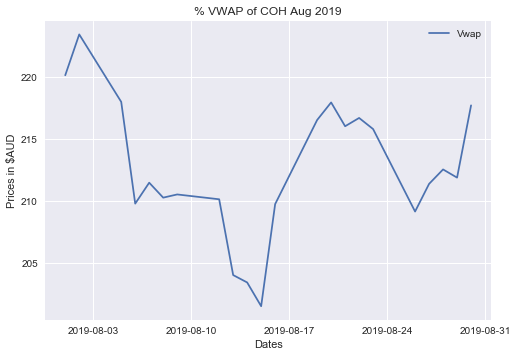

In [17]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111)
plt.plot(daily_df["Date"],daily_df["Vwap"])
plt.style.use('seaborn')
plt.ylabel('Prices in $AUD')
plt.xlabel('Dates')
plt.title("% VWAP of COH Aug 2019")
plt.legend() 

# Broker-Market Share

In [18]:
import os
import pandas as pd
import numpy as np
import datetime
import copy
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)
tempdf=copy.deepcopy(out_df)
sellerids=tempdf["SellerName"]
buyerids=tempdf["BuyerName"]
totallist=buyerids.append(sellerids)
totallist= list(set(totallist))
buyerids= list(set(buyerids))
sellerids= list(set(sellerids))

totalshare=tempdf["TradeVolume"].sum()*2

halftotalshare=tempdf["TradeVolume"].sum()

share_dict_total = dict.fromkeys(totallist)
share_dict_sell_side = dict.fromkeys(sellerids)
share_dict_buy_side = dict.fromkeys(buyerids)

for i in range(len(tempdf)):
    if(share_dict_total[tempdf.iloc[i]['SellerName']]==None):
        share_dict_total[tempdf.iloc[i]['SellerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['SellerName']]=share_dict_total[tempdf.iloc[i]['SellerName']]+tempdf.iloc[i]['TradeVolume']
    if(share_dict_total[tempdf.iloc[i]['BuyerName']]==None):
        share_dict_total[tempdf.iloc[i]['BuyerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['BuyerName']]=share_dict_total[tempdf.iloc[i]['BuyerName']]+tempdf.iloc[i]['TradeVolume']
    if(share_dict_buy_side[tempdf.iloc[i]['BuyerName']]==None):
        share_dict_buy_side[tempdf.iloc[i]['BuyerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_buy_side[tempdf.iloc[i]['BuyerName']]=share_dict_buy_side[tempdf.iloc[i]['BuyerName']]+tempdf.iloc[i]['TradeVolume']
    if(share_dict_sell_side[tempdf.iloc[i]['SellerName']]==None):
        share_dict_sell_side[tempdf.iloc[i]['SellerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_sell_side[tempdf.iloc[i]['SellerName']]=share_dict_sell_side[tempdf.iloc[i]['SellerName']]+tempdf.iloc[i]['TradeVolume']
    

In [19]:
pd.options.display.float_format = '{:.2f}'.format

# Broker_share_total

In [20]:
p1=share_dict_total
for key in p1.keys():
    p1[key]=100*(p1[key]/totalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
temp_df = pd.DataFrame(list(zip(keylist, vallist)))
temp_df.columns = ['a', 'b']
temp_df=temp_df.sort_values(by=['b'], ascending=False)
temp_df=temp_df.reset_index()
temp_df.drop(['index'], axis=1,inplace=True)
df2 = temp_df.sort_values('b', ascending=False)[:10]
s = temp_df.sort_values('b', ascending=False).b[10:].sum()
df2.loc[len(df2)]=['Others', s]
df2.columns = ['Company', 'Share in %']
temp_df.columns = ['Company', 'Share in %']

temp_df.to_excel(TLS_writer, sheet_name='Broker_share_total')
df2

,Company,Share in %
0,Morgan Stanley,20.73
1,UBS,19.30
2,Macquarie Insto,10.44
3,Citigroup,7.85
4,Merrill Lynch,7.60
5,Goldman Sachs,5.59
6,Credit Suisse,5.23
7,Deutsche,4.39
8,ABN AMRO Clear,3.98
9,JPMorgan,3.80


# Broker_share_buy

In [21]:
p1=copy.deepcopy(share_dict_buy_side)
for key in p1.keys():
    p1[key]=100*(p1[key]/halftotalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
temp_df = pd.DataFrame(list(zip(keylist, vallist)))
temp_df.columns = ['a', 'b']
temp_df=temp_df.sort_values(by=['b'], ascending=False)
temp_df=temp_df.reset_index()
temp_df.drop(['index'], axis=1,inplace=True)
df2 = temp_df.sort_values('b', ascending=False)[:10]
s = temp_df.sort_values('b', ascending=False).b[10:].sum()
df2.loc[len(df2)]=['Others', s]
df2.columns = ['Company', 'Share in %']
temp_df.columns = ['Company', 'Share in %']

temp_df.to_excel(TLS_writer, sheet_name='Broker_share_buy')
df2

,Company,Share in %
0,Morgan Stanley,21.05
1,UBS,20.00
2,Macquarie Insto,10.44
3,Citigroup,9.13
4,Merrill Lynch,5.80
5,Goldman Sachs,5.47
6,Credit Suisse,4.89
7,Deutsche,4.41
8,InstinetNomura,4.28
9,ABN AMRO Clear,3.97


# Broker_share_sell

In [22]:
p1=copy.deepcopy(share_dict_sell_side)
for key in p1.keys():
    p1[key]=100*(p1[key]/halftotalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
temp_df = pd.DataFrame(list(zip(keylist, vallist)))
temp_df.columns = ['a', 'b']
temp_df=temp_df.sort_values(by=['b'], ascending=False)
temp_df=temp_df.reset_index()
temp_df.drop(['index'], axis=1,inplace=True)
df2 = temp_df.sort_values('b', ascending=False)[:10]
s = temp_df.sort_values('b', ascending=False).b[10:].sum()
df2.loc[len(df2)]=['Others', s]
df2.columns = ['Company', 'Share in %']
temp_df.columns = ['Company', 'Share in %']

temp_df.to_excel(TLS_writer, sheet_name='Broker_share_sell')
df2

,Company,Share in %
0,Morgan Stanley,20.41
1,UBS,18.60
2,Macquarie Insto,10.45
3,Merrill Lynch,9.40
4,Citigroup,6.57
5,Goldman Sachs,5.72
6,Credit Suisse,5.57
7,Deutsche,4.37
8,ABN AMRO Clear,3.98
9,JPMorgan,3.83


# Broker Market Share Block Trades

In [23]:
import os
import pandas as pd
import numpy as np
import datetime
import copy
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

(out_df["CondCodes"]).unique()

ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]


m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","LT","MC"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

m2 = {v: k for k,vv in m.items() for v in vv}

ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))

import os
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt 
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

matching=out_df.loc[out_df["Reason"]=="MATCH"]

non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

from datetime import time
A=time(hour =9, minute = 59, second = 45)
B=time(hour =10, minute = 10, second = 0)

openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

from datetime import time
A=time(hour =16, minute = 0, second = 0)
B=time(hour =16, minute = 12, second = 0)
closingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

openingauction["CondCodes"]="OpeningAuction"

closingauction["CondCodes"]="ClosingAuction"

auction=pd.concat([openingauction,closingauction])

totaldf=pd.concat([auction,non_auction])

asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

t0=totaldf.loc[totaldf["CondCodes"]=="EP" ]
t1=totaldf.loc[totaldf["CondCodes"]=="EPXT"]
t2=totaldf.loc[totaldf["CondCodes"]=="EC"]
t3=totaldf.loc[totaldf["CondCodes"]=="ECXT"]
optionsdf=pd.concat([t0,t1,t2,t3])

temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
for val in temp:
    trade_blocklist.append(val+str("XT"))

    temp=["L","LT","L1","L2","L3","L4","L5"]
trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
for val in temp:
    trade_otherlist.append(val+str("XT"))

trade_optionslist=["EC","ECXT","EP","EPXT"]
trade_misc=["OSXT","ET","ETXT"]
trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))


tempdf=pd.concat([asxdf,ChiXdf])
tempdf["Tradetype"].unique()

chiblock=tempdf.loc[tempdf["Tradetype"]=="CHIXblock" ]
asxblock=tempdf.loc[tempdf["Tradetype"]=="ASXBlock" ]
totalblock=pd.concat([asxblock,chiblock])


tempdf=copy.deepcopy(totalblock)
sellerids=tempdf["SellerName"]
buyerids=tempdf["BuyerName"]
totallist=buyerids.append(sellerids)
totallist= list(set(totallist))
buyerids= list(set(buyerids))
sellerids= list(set(sellerids))

totalshare=tempdf["TradeVolume"].sum()*2

share_dict_total = dict.fromkeys(totallist)

for i in range(len(tempdf)):
    if(share_dict_total[tempdf.iloc[i]['SellerName']]==None):
        share_dict_total[tempdf.iloc[i]['SellerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['SellerName']]=share_dict_total[tempdf.iloc[i]['SellerName']]+tempdf.iloc[i]['TradeVolume']
    if(share_dict_total[tempdf.iloc[i]['BuyerName']]==None):
        share_dict_total[tempdf.iloc[i]['BuyerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['BuyerName']]=share_dict_total[tempdf.iloc[i]['BuyerName']]+tempdf.iloc[i]['TradeVolume']
    
p1=copy.deepcopy(share_dict_total)
for key in p1.keys():
    p1[key]=100*(p1[key]/totalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
p1=share_dict_total
for key in p1.keys():
    p1[key]=100*(p1[key]/totalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
temp_df = pd.DataFrame(list(zip(keylist, vallist)))
temp_df.columns = ['a', 'b']
temp_df=temp_df.sort_values(by=['b'], ascending=False)
temp_df=temp_df.reset_index()
temp_df.drop(['index'], axis=1,inplace=True)
df2 = temp_df.sort_values('b', ascending=False)[:10]
s = temp_df.sort_values('b', ascending=False).b[10:].sum()
df2.loc[len(df2)]=['Others', s]
df2.columns = ['Company', 'Share in %']
temp_df.columns = ['Company', 'Share in %']

temp_df.to_excel(TLS_writer, sheet_name='Block_Broker_share_total')
df2

,Company,Share in %
0,Morgan Stanley,42.19
1,UBS,23.38
2,Goldman Sachs,8.15
3,Merrill Lynch,6.61
4,Citigroup,6.29
5,Macquarie Insto,6.26
6,JPMorgan,2.63
7,Credit Suisse,2.48
8,Deutsche,1.39
9,Evans & Partner,0.62


# NBBO broker share

In [24]:
tempdf=pd.concat([asxdf,ChiXdf])
tempdf["Tradetype"].unique()

chiblock=tempdf.loc[tempdf["Tradetype"]=="CHIXNBBO"]
asxblock=tempdf.loc[tempdf["Tradetype"]=="ASXNBBO"]
totalblock=pd.concat([asxblock,chiblock])


tempdf=copy.deepcopy(totalblock)
sellerids=tempdf["SellerName"]
buyerids=tempdf["BuyerName"]
totallist=buyerids.append(sellerids)
totallist= list(set(totallist))
buyerids= list(set(buyerids))
sellerids= list(set(sellerids))

totalshare=tempdf["TradeVolume"].sum()*2

share_dict_total = dict.fromkeys(totallist)

for i in range(len(tempdf)):
    if(share_dict_total[tempdf.iloc[i]['SellerName']]==None):
        share_dict_total[tempdf.iloc[i]['SellerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['SellerName']]=share_dict_total[tempdf.iloc[i]['SellerName']]+tempdf.iloc[i]['TradeVolume']
    if(share_dict_total[tempdf.iloc[i]['BuyerName']]==None):
        share_dict_total[tempdf.iloc[i]['BuyerName']]=tempdf.iloc[i]['TradeVolume']
    else:
        share_dict_total[tempdf.iloc[i]['BuyerName']]=share_dict_total[tempdf.iloc[i]['BuyerName']]+tempdf.iloc[i]['TradeVolume']
    
p1=copy.deepcopy(share_dict_total)
for key in p1.keys():
    p1[key]=100*(p1[key]/totalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
p1=share_dict_total
for key in p1.keys():
    p1[key]=100*(p1[key]/totalshare)
keylist=[]
vallist=[]
for key in p1.keys():
    keylist.append(key)
    vallist.append(p1[key])
temp_df = pd.DataFrame(list(zip(keylist, vallist)))
temp_df.columns = ['a', 'b']
temp_df=temp_df.sort_values(by=['b'], ascending=False)
temp_df=temp_df.reset_index()
temp_df.drop(['index'], axis=1,inplace=True)
df2 = temp_df.sort_values('b', ascending=False)[:10]
s = temp_df.sort_values('b', ascending=False).b[10:].sum()
df2.loc[len(df2)]=['Others', s]
df2.columns = ['Company', 'Share in %']
temp_df.columns = ['Company', 'Share in %']

temp_df.to_excel(TLS_writer, sheet_name='NBBO_Broker_share_total')
df2

,Company,Share in %
0,Merrill Lynch,36.93
1,JPMorgan,15.49
2,Goldman Sachs,15.13
3,Credit Suisse,13.95
4,Morgan Stanley,11.32
5,Macquarie Insto,3.02
6,InstinetNomura,2.48
7,Deutsche,0.81
8,Citigroup,0.43
9,UBS,0.29


# Distribution of Trade-Sizes

In [25]:
xl_file = pd.ExcelFile("COH Course of Sales.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

tempdfs=copy.deepcopy(dfs)
for key in dfs.keys():
    if(len(dfs[key])==0):
        del tempdfs[key]

dfs=tempdfs
finaldf=pd.DataFrame()
for key in dfs.keys():
    tdf=dfs[key]
    tempdf=copy.deepcopy(tdf)
    df=copy.deepcopy(tdf)
    for i in range(len(df)):
        if(df.loc[i]['TradeVolume']<0):
            tempdf.drop(index=i,inplace=True)
            tempdf.drop(index=i+1,inplace=True)
    if(len(finaldf)==0):
        finaldf=tempdf
    else:
        finaldf=pd.concat([finaldf,tempdf])


In [26]:
pd.options.display.float_format = '{:.2f}'.format

In [27]:
out_df=copy.deepcopy(finaldf)

ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]


m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","LT","MC"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

m2 = {v: k for k,vv in m.items() for v in vv}

ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))

import os
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt 

matching=out_df.loc[out_df["Reason"]=="MATCH"]

non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

from datetime import time
A=time(hour =9, minute = 59, second = 45)
B=time(hour =10, minute = 10, second = 0)

openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

from datetime import time
A=time(hour =16, minute = 0, second = 0)
B=time(hour =16, minute = 12, second = 0)
closingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

openingauction["CondCodes"]="OpeningAuction"

closingauction["CondCodes"]="ClosingAuction"

auction=pd.concat([openingauction,closingauction])

totaldf=pd.concat([auction,non_auction])

asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

t0=totaldf.loc[totaldf["CondCodes"]=="EP" ]
t1=totaldf.loc[totaldf["CondCodes"]=="EPXT"]
t2=totaldf.loc[totaldf["CondCodes"]=="EC"]
t3=totaldf.loc[totaldf["CondCodes"]=="ECXT"]
optionsdf=pd.concat([t0,t1,t2,t3])

temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
for val in temp:
    trade_blocklist.append(val+str("XT"))

    temp=["L","LT","L1","L2","L3","L4","L5"]
trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
for val in temp:
    trade_otherlist.append(val+str("XT"))

trade_optionslist=["EC","ECXT","EP","EPXT"]
trade_misc=["OSXT","ET","ETXT"]
trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))


tempdf=pd.concat([asxdf,ChiXdf])


#### NOTE:
#### Count here refers to the number of observations in particular category
#### 25,50 and 75 are the percentile values

# Block-Trades

In [28]:
chiblock=tempdf.loc[tempdf["Tradetype"]=="CHIXblock" ]
asxblock=tempdf.loc[tempdf["Tradetype"]=="ASXBlock" ]
totalblock=pd.concat([asxblock,chiblock])
totalblock["TradeValue"].describe()

count         48.00
mean     3874859.58
std     10266987.60
min        84220.92
25%       496307.52
50%       814369.20
75%      2706835.65
max     58386240.00
Name: TradeValue, dtype: float64

# ASX Trades

In [29]:
asxdf["TradeValue"].describe()

count     404343.00
mean        2393.62
std       130500.82
min          199.57
25%          218.17
50%          660.24
75%         1476.58
max     58386240.00
Name: TradeValue, dtype: float64

# CHI-X

In [30]:
ChiXdf["TradeValue"].describe()

count     35490.00
mean       2430.86
std       65117.23
min         199.91
25%         211.68
50%         420.09
75%         893.39
max     6758000.00
Name: TradeValue, dtype: float64

# CenterPt

In [31]:
cppdf=tempdf.loc[tempdf["Tradetype"]=="ASXCentrept-Pref" ]
cpdf=tempdf.loc[tempdf["Tradetype"]=="ASXCentrePt" ]
totalcpblock=pd.concat([cppdf,cpdf])
totalcpblock["TradeValue"].describe()

count    46983.00
mean      1823.39
std       8115.91
min        199.90
25%        223.67
50%        648.03
75%       1622.20
max     839940.00
Name: TradeValue, dtype: float64

# Crossing

In [32]:
chinbbodf=tempdf.loc[tempdf["Tradetype"]=="CHIXNBBO" ]
asxnbbodf=tempdf.loc[tempdf["Tradetype"]=="ASXNBBO" ]
totalcpblock=pd.concat([chinbbodf,asxnbbodf])
totalcpblock["TradeValue"].describe()

count     18404.00
mean       1373.43
std       30881.38
min         200.25
25%         210.05
50%         217.99
75%         657.62
max     2043350.00
Name: TradeValue, dtype: float64

# Herfindahl Index

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy
from datetime import time

xl_file = pd.ExcelFile("COH Course of Sales.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

tempdfs=copy.deepcopy(dfs)
for key in dfs.keys():
    if(len(dfs[key])==0):
        del tempdfs[key]
dfs=tempdfs
checkingdf_prefilter=dfs
checkingdf_postfilter=dfs
groupeddf=dfs
checking_NBBO=dfs
daily_dataframe={}
daily_dataframe['Date']= []
daily_dataframe['Public-ASXOnmarket-lit']= []
daily_dataframe['Public-ASXCentre']= []
daily_dataframe['Public-CHIX']= []
daily_dataframe['Public-HHI'] = []
daily_dataframe['Total-ASXOnmarket-lit']= []
daily_dataframe['Total-ASXCentre']= []
daily_dataframe['Total-CHIX']= []
daily_dataframe['Total-CLSA'] = []
daily_dataframe['Total-GoldmanSachs'] = []
daily_dataframe['Total-UBS'] = []
daily_dataframe['Total-Citigroup'] = []
daily_dataframe['Total-JPMorgan'] = []
daily_dataframe['Total-CreditSuisse'] = []
daily_dataframe['Total-MerrillLynch'] = []
daily_dataframe['Total-Deutsche'] = []
daily_dataframe['Total-MorganStanley'] = []
daily_dataframe['Total-MacquarieInsto'] = []
daily_dataframe['Total-VirtuITG'] = []
daily_dataframe['Total-InstinetNomura'] = []
daily_dataframe['Total-HHI'] = []

for key in dfs.keys():
    tdf=dfs[key]
    out_df=copy.deepcopy(tdf)
    
    ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]

    m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","LT","MC"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

    m2 = {v: k for k,vv in m.items() for v in vv}

    ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))
    
    matching=out_df.loc[out_df["Reason"]=="MATCH"]
    non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

    A=time(hour =9, minute = 59, second = 45)
    B=time(hour =10, minute = 10, second = 0)

    openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

    A=time(hour =16, minute = 0, second = 0)
    B=time(hour =16, minute = 12, second = 0)
    closingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

    openingauction["CondCodes"]="OpeningAuction"

    closingauction["CondCodes"]="ClosingAuction"

    auction=pd.concat([openingauction,closingauction])

    totaldf=pd.concat([auction,non_auction])

    asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

    temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
    trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
    for val in temp:
        trade_blocklist.append(val+str("XT"))

        temp=["L","LT","L1","L2","L3","L4","L5"]
    trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
    for val in temp:
        trade_otherlist.append(val+str("XT"))

    trade_optionslist=["EC","ECXT","EP","EPXT"]
    trade_misc=["OSXT","ET","ETXT"]
    trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

    mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

    mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

    asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))
    tempdf=pd.concat([asxdf,ChiXdf])
    daily_df1=tempdf.loc[tempdf["Tradetype"]=="ASXOpenAuction"]
    daily_df2=tempdf.loc[tempdf["Tradetype"]=="ASXCloseAuction"]
    daily_df3=tempdf.loc[tempdf["Tradetype"]=="ASXOn-market lit"]
    daily_df4=tempdf.loc[tempdf["Tradetype"]=="ASXCentrePt"]
    daily_df5=tempdf.loc[tempdf["Tradetype"]=="ASXNBBO"]
    daily_df6=tempdf.loc[tempdf["Tradetype"]=="ASXCentrept-Pref"]
    daily_df7=tempdf.loc[tempdf["Tradetype"]=="CHIXon-market lit"]
    daily_df8=tempdf.loc[tempdf["Tradetype"]=="CHIXNBBO"]
    daily_df9=tempdf.loc[tempdf["Tradetype"]=="CHIXon-market hidden"]
    daily_df=pd.concat([daily_df3,daily_df4,daily_df6,daily_df7,daily_df9])
    nbbo_df=pd.concat([daily_df8,daily_df5])
    mapoftradetype = {"type1": ["ASXOn-market lit"], "type2": ["ASXCentrePt","ASXCentrept-Pref"], "type3": ["CHIXon-market lit","CHIXon-market hidden"]}
    mappedtradetype={v: k for k,vv in mapoftradetype.items() for v in vv}
    daily_df["Tradetype2"]=daily_df.Tradetype.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))
    nbbo_df["Tradetype2"]=nbbo_df["BuyerName"]
    nbbo_df=nbbo_df[nbbo_df["Tradetype2"]!='Evans & Partner']
    nine_to_four_df=copy.deepcopy(daily_df)
    date=nine_to_four_df.iloc[0]["TradeDate"].date()
    halftotalshare=nine_to_four_df["TradeVolume"].sum()
    temp_final_df=copy.deepcopy(nine_to_four_df)
    temp_final_df["TradeVolume"]=temp_final_df["TradeVolume"]/halftotalshare
    temp_final_df=temp_final_df.groupby("Tradetype2").sum()
    temp_final_df.reset_index(inplace=True)
    publichhiindex=0
    public_asx_On_Market_lit=0
    public_asx_Centre=0
    public_chi_all=0
    total_asx_On_Market_lit=0
    total_asx_Centre=0
    total_chi_all=0
    total_clsa=0
    total_goldmansachs=0
    total_ubs=0
    total_citigroup=0
    total_jpmorgan=0
    total_creditsuisse=0
    total_merrilllynch=0
    total_deutsche=0
    total_morganstanley=0
    total_macquarie=0
    total_virtu_itg=0
    total_instinetnoumra=0
    for i in range(len(temp_final_df)):
        publichhiindex=publichhiindex+temp_final_df.iloc[i]["TradeVolume"]**2
        if(temp_final_df.iloc[i]["Tradetype2"]=="type1"):
            public_asx_On_Market_lit=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="type2"):
            public_asx_Centre=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="type3"):
            public_chi_all=temp_final_df.iloc[i]["TradeVolume"]
    nine_to_four_df=copy.deepcopy(daily_df)
    nine_to_four_df=pd.concat([nine_to_four_df,nbbo_df])
    halftotalshare=nine_to_four_df["TradeVolume"].sum()
    temp_final_df=copy.deepcopy(nine_to_four_df)
    temp_final_df["TradeVolume"]=temp_final_df["TradeVolume"]/halftotalshare
    temp_final_df=temp_final_df.groupby("Tradetype2").sum()
    temp_final_df.reset_index(inplace=True)
    #temp_final_df["TradeVolume"]=temp_final_df["TradeVolume"]/halftotalshare
    totalhhiindex=0
    for i in range(len(temp_final_df)):
        totalhhiindex=totalhhiindex+temp_final_df.iloc[i]["TradeVolume"]**2
        if(temp_final_df.iloc[i]["Tradetype2"]=="type1"):
            total_asx_On_Market_lit=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="type2"):
            total_asx_Centre=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="type3"):
            total_chi_all=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="CLSA"):
            total_clsa=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Goldman Sachs"):
            total_goldmansachs=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="UBS"):
            total_ubs=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Citigroup"):
            total_citigroup=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="JPMorgan"):
            total_jpmorgan=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Credit Suisse"):
            total_creditsuisse=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Merrill Lynch"):
            total_merrilllynch=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Deutsche"):
            total_deutsche=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Morgan Stanley"):
            total_morganstanley=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Macquarie Insto"):
            total_macquarie=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="Virtu ITG Aust."):
            total_virtu_itg=temp_final_df.iloc[i]["TradeVolume"]
        elif(temp_final_df.iloc[i]["Tradetype2"]=="InstinetNomura"):
            total_instinetnoumra=temp_final_df.iloc[i]["TradeVolume"]
    daily_dataframe['Date'].append(date)
    daily_dataframe['Public-ASXOnmarket-lit'].append(public_asx_On_Market_lit)
    daily_dataframe['Public-ASXCentre'].append(public_asx_Centre)
    daily_dataframe['Public-CHIX'].append(public_chi_all)
    daily_dataframe['Public-HHI'].append(publichhiindex)
    daily_dataframe['Total-ASXOnmarket-lit'].append(total_asx_On_Market_lit)
    daily_dataframe['Total-ASXCentre'].append(total_asx_Centre)
    daily_dataframe['Total-CHIX'].append(total_chi_all)
    daily_dataframe['Total-CLSA'].append(total_clsa)
    daily_dataframe['Total-GoldmanSachs'].append(total_goldmansachs)
    daily_dataframe['Total-UBS'].append(total_ubs)
    daily_dataframe['Total-Citigroup'].append(total_citigroup)
    daily_dataframe['Total-JPMorgan'].append(total_jpmorgan)
    daily_dataframe['Total-CreditSuisse'].append(total_creditsuisse)
    daily_dataframe['Total-MerrillLynch'].append(total_merrilllynch)
    daily_dataframe['Total-Deutsche'].append(total_deutsche)
    daily_dataframe['Total-MorganStanley'].append(total_morganstanley)
    daily_dataframe['Total-MacquarieInsto'].append(total_macquarie)
    daily_dataframe['Total-VirtuITG'].append(total_virtu_itg)
    daily_dataframe['Total-InstinetNomura'].append(total_instinetnoumra)
    daily_dataframe['Total-HHI'].append(totalhhiindex)

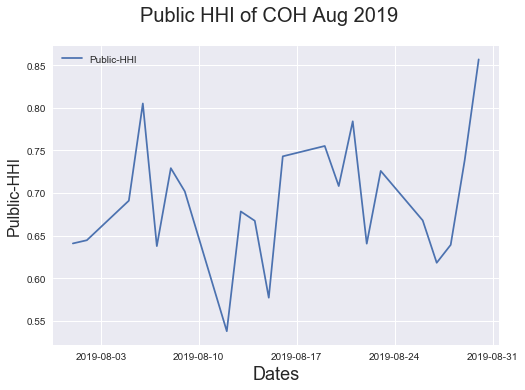

In [34]:
TLS_daily_hhi_df2=pd.DataFrame.from_dict(daily_dataframe)
TLS_daily_hhi_df2=TLS_daily_hhi_df2.sort_values("Date")
fig = plt.figure()
# Create matplotlib figure
ax = fig.add_subplot(111)
fig.suptitle("Public HHI of COH Aug 2019", fontsize=20)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Pulblic-HHI', fontsize=16)
plt.plot(TLS_daily_hhi_df2["Date"],TLS_daily_hhi_df2["Public-HHI"])
plt.legend() 

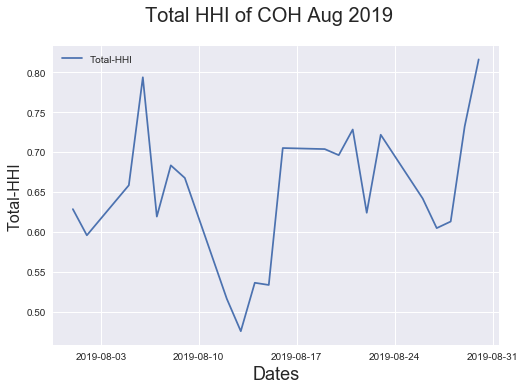

In [35]:
TLS_daily_hhi_df2=pd.DataFrame.from_dict(daily_dataframe)
TLS_daily_hhi_df2=TLS_daily_hhi_df2.sort_values("Date")
fig = plt.figure()
# Create matplotlib figure
fig.suptitle("Total HHI of COH Aug 2019", fontsize=20)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Total-HHI', fontsize=16)
ax = fig.add_subplot(111)
plt.plot(TLS_daily_hhi_df2["Date"],TLS_daily_hhi_df2["Total-HHI"])
plt.legend() 

In [36]:
TLS_daily_hhi_df2.to_excel(TLS_writer, sheet_name='HHI_index')


# 10min pattern

In [37]:
import os
import pandas as pd
import numpy as np
import datetime
import copy
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

(out_df["CondCodes"]).unique()

ChiXdf=out_df.loc[out_df["DataSource"]=="CXA"]


m = {"CHIXblock": ["SP","SX","SXDE"], "CHIXother": ["PC","PO","ET","MC","LT"], "CHIXNBBO": ["NX","NXXT"],"CHIXon-market hidden":["HL","BR"], "CHIXon-market lit": [np.nan,"XT","S","B"]}

m2 = {v: k for k,vv in m.items() for v in vv}

ChiXdf["Tradetype"]=ChiXdf.CondCodes.map(m2).astype("category", categories=set(m2.values()))

import os
import pandas as pd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt 
cdf = pd.read_excel("COH Course of Sales.xlsx", sheet_name=None)

out_df = pd.concat(cdf,ignore_index=True)

matching=out_df.loc[out_df["Reason"]=="MATCH"]

non_auction=out_df.loc[out_df["Reason"]!="MATCH"]

from datetime import time
A=time(hour =9, minute = 59, second = 45)
B=time(hour =10, minute = 10, second = 0)

openingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

from datetime import time
A=time(hour =16, minute = 0, second = 0)
B=time(hour =16, minute = 12, second = 0)
closingauction=matching.loc[(matching['TradeTime']>=A)&(matching['TradeTime']<=B)]

openingauction["CondCodes"]="OpeningAuction"

closingauction["CondCodes"]="ClosingAuction"

auction=pd.concat([openingauction,closingauction])

totaldf=pd.concat([auction,non_auction])

asxdf=totaldf.loc[totaldf["DataSource"]=="TM"]

t0=totaldf.loc[totaldf["CondCodes"]=="EP" ]
t1=totaldf.loc[totaldf["CondCodes"]=="EPXT"]
t2=totaldf.loc[totaldf["CondCodes"]=="EC"]
t3=totaldf.loc[totaldf["CondCodes"]=="ECXT"]
optionsdf=pd.concat([t0,t1,t2,t3])

temp=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
trade_blocklist=["SX","SP","SA","S0","S1","S2","S3","P1","P2","PT"]
for val in temp:
    trade_blocklist.append(val+str("XT"))

    temp=["L","LT","L1","L2","L3","L4","L5"]
trade_otherlist=["L","LT","L1","L2","L3","L4","L5"]
for val in temp:
    trade_otherlist.append(val+str("XT"))

trade_optionslist=["EC","ECXT","EP","EPXT"]
trade_misc=["OSXT","ET","ETXT"]
trade_otherlist=trade_otherlist+trade_optionslist+trade_misc

mapoftradetype = {"ASXOpenAuction": ["OpeningAuction"], "ASXCloseAuction": ["ClosingAuction"], "ASXNBBO": ["NX","NXXT"],"ASXCentrePt":["CX","CP","CXXT"],"ASXCentrept-Pref":["CE","CEXT"], "ASXOn-market lit": [np.nan,"XT","EQTM"],"ASXBlock":trade_blocklist,"ASXOthers":trade_otherlist}

mappedtradetype = {v: k for k,vv in mapoftradetype.items() for v in vv}

asxdf["Tradetype"]=asxdf.CondCodes.map(mappedtradetype).astype("category", categories=set(mappedtradetype.values()))


tempdf=pd.concat([asxdf,ChiXdf])

daily_df1=tempdf.loc[tempdf["Tradetype"]=="ASXOpenAuction"]
daily_df2=tempdf.loc[tempdf["Tradetype"]=="ASXCloseAuction"]
daily_df3=tempdf.loc[tempdf["Tradetype"]=="ASXOn-market lit"]
daily_df4=tempdf.loc[tempdf["Tradetype"]=="ASXCentrePt"]
daily_df5=tempdf.loc[tempdf["Tradetype"]=="ASXNBBO"]
daily_df6=tempdf.loc[tempdf["Tradetype"]=="ASXCentrept-Pref"]
daily_df7=tempdf.loc[tempdf["Tradetype"]=="CHIXon-market lit"]
daily_df8=tempdf.loc[tempdf["Tradetype"]=="CHIXNBBO"]
daily_df9=tempdf.loc[tempdf["Tradetype"]=="'CHIXon-market hidden'"]

daily_df=pd.concat([daily_df3,daily_df4,daily_df5,daily_df6,daily_df7,daily_df8,daily_df9])

time1=pd.date_range('1/1/2001', periods=144, freq='10min')

timedict={}
revtimedict={}
revtimedict[0]="Opening Auction"
revtimedict[1000]="Closing Auction"
count=1;
for timestamp in time1:
    timedict[timestamp.time()]=(count)
    revtimedict[(count)]=timestamp.time()
    count=count+1

In [38]:
listoftimes=[]
for i in range(len(daily_df)):
    #print(ChiXdf1.iloc[i]["TradeTime"])
    for timekey in timedict:
        if(daily_df.iloc[i]["TradeTime"]<=timekey):
            listoftimes.append(timedict[timekey])
            break

daily_df["timeblock"]=listoftimes


In [39]:
daily_df.to_csv("COH_timeblock.csv")

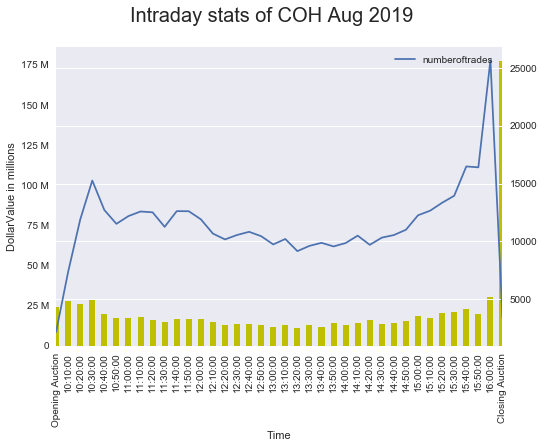

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy
daily_df=pd.read_csv("COH_timeblock.csv")

daily_df1["timeblock"]=0
daily_df2["timeblock"]=1000

final_daily_df=pd.concat([daily_df1,daily_df2,daily_df])

tempdf=final_daily_df.groupby("timeblock").sum()

tempdf.reset_index(inplace=True)

def converttimeback(time):
    return revtimedict[time]

tempdf["timeblock2"]=tempdf["timeblock"].apply(converttimeback)

tempdf=tempdf.sort_values("timeblock")

tempdf=tempdf.set_index('timeblock2')


gg=final_daily_df.groupby("timeblock")

gp=gg.size()
tr=gp.to_frame()

tr.reset_index(inplace=True)

l1=list(tr["timeblock"].values)

l2=list(tr[0])
l3=[]
for time in l1:
    l3.append(revtimedict[time])

dfff=pd.DataFrame(list(zip(l1, l2,l3)), columns =['timeblock1', 'numberoftrades',"timeblock2"])

dfff=dfff.set_index("timeblock2")

final_10min_df=dfff.join(tempdf)

final_10min_df = final_10min_df[['numberoftrades',"TradeValue",'timeblock']]

final_10min_df.reset_index(inplace=True)

final_10min_df.to_excel(TLS_writer, sheet_name='Intraday_stats')

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
final_10min_df["TradeValue"].plot(kind='bar',color='y')
final_10min_df['numberoftrades'].plot(kind='line', secondary_y=True)
ax.set_xticklabels(final_10min_df["timeblock2"], rotation=90)
ax.set_ylabel('DollarValue in millions')
ax.set_xlabel('Time')
# Create another axes that shares the same x-axis as ax.
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0]
    suffix  = ["G", "M", "k", ""]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return y

ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
fig.suptitle("Intraday stats of COH Aug 2019", fontsize=20)
plt.legend(loc='upper right')
plt.style.use('seaborn')
plt.show()

In [41]:
TLS_writer.save()